<a href="https://colab.research.google.com/github/mdnur/cvpr_23_24_spring/blob/main/face_recognition_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import random

TRAIN_DATA_DIR = '/content/drive/MyDrive/Training Data'
IMG_SIZE = 227
split_ratio = 0.8  # 80% training, 20% validation

CATEGORIES = [folder for folder in os.listdir(TRAIN_DATA_DIR) if os.path.isdir(os.path.join(TRAIN_DATA_DIR, folder))]
print("Categories:", CATEGORIES)

training_data = []
test_data = []
validation_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c)
    class_num = CATEGORIES.index(c)

    # List all images in the current category
    img_files = os.listdir(path)

    # Shuffle the list of images
    random.shuffle(img_files)

    # Split the data into train, validation, and test sets
    num_samples = len(img_files)
    num_train_samples = int(num_samples * split_ratio * 0.8)
    num_valid_samples = int(num_samples * split_ratio * 0.2)

    train_files = img_files[:num_train_samples]
    valid_files = img_files[num_train_samples:num_train_samples + num_valid_samples]
    test_files = img_files[num_train_samples + num_valid_samples:]

    # Load and process training data
    for img in tqdm(train_files, desc=f'Processing {c} - Train'):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([img_resized, class_num])
        except Exception as e:
            pass

    # Load and process validation data
    for img in tqdm(valid_files, desc=f'Processing {c} - Validation'):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            validation_data.append([img_resized, class_num])
        except Exception as e:
            pass

    # Load and process test data
    for img in tqdm(test_files, desc=f'Processing {c} - Test'):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass

# Shuffle the data
random.shuffle(training_data)
random.shuffle(validation_data)
random.shuffle(test_data)

# Extract features (X) and labels (Y)
X_train, Y_train = zip(*training_data)
X_valid, Y_valid = zip(*validation_data)
X_test, Y_test = zip(*test_data)

# Convert to numpy arrays and reshape
X_train = np.array(X_train).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_train = np.array(Y_train)
X_valid = np.array(X_valid).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_valid = np.array(Y_valid)
X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

# Print the number of samples in each set
print("Number of training samples:", len(training_data))
print("Number of validation samples:", len(validation_data))
print("Number of test samples:", len(test_data))


Categories: ['MOHAMMAD BIN AB JALIL SHEAKH', 'MD IMTIAJ ALAM SAJIN', 'IMAM HASAN JAMI', 'TAHMID AL RAFID SIDDIQUE', 'ESM-E MOULA CHOWDHURY ABHA', 'FAIZA BINTE ZAMAN', 'MD ATIK ULLAH KHAN', 'MD TAREK MAHMUD', 'NAVID MAHFUZ NAYEEM', 'SRABONE RAXIT', 'RAHAD-UL-ISLAM RABBY', 'REZWAN AHMAD', 'SHEIKH AKIB ALMAS', 'SYEDA HUMAIRA JABEEN', 'MD SHANZID HASAN', 'BISHANATH TARAFDER', 'MD JAHID HASSAN', 'MD NAIMUR RAHMAN', 'FAHIM RAHMAN', 'AL-NAFI', 'MD FARDIN AMIN RIYAD', 'MD TOYABUR RAHAMAN', 'S M FAISAL', 'ABDULLAH AL SHAHRIAR', 'MOHAMMAD NUR', 'NAFIS MUBASSHIR SHAH', 'TAHFIM IBN KHAN', 'SATYAJIT DAS', 'AHMED IMTIAZ', 'MD WAHIDUZZAMAN SUVA', 'NAHAR ISLAM NISHI', 'MD ABU ZAYED KHAN', 'MD SAJID ISLAM KHAN', 'TARIKUL ISLAM NISHAT', 'MOHAMMED TANVIR HASSAN', 'SADAT BIN MASUD', 'MD MUNTASIR AREFIN NAEEM']


Processing MOHAMMAD BIN AB JALIL SHEAKH - Train: 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]
Processing MOHAMMAD BIN AB JALIL SHEAKH - Validation: 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]
Processing ESM-E MOULA CHOWDHURY ABHA - Train: 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]
Processing ESM-E MOULA CHOWDHURY ABHA - Validation: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]
Processing MD MUNTASIR AREFIN NAEEM - Test: 100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Number of training samples: 338
Number of validation samples: 74
Number of test samples: 147


In [41]:
# Save pickled data
with open("/content/drive/MyDrive/X_train.pickle", "wb") as pickle_out:
    pickle.dump(X_train, pickle_out)


with open("/content/drive/MyDrive/Y_train.pickle", "wb") as pickle_out:
    pickle.dump(Y_train, pickle_out)

with open("/content/drive/MyDrive/X_valid.pickle", "wb") as pickle_out:
    pickle.dump(X_valid, pickle_out)

with open("/content/drive/MyDrive/Y_valid.pickle", "wb") as pickle_out:
    pickle.dump(Y_valid, pickle_out)

with open("/content/drive/MyDrive/X_test.pickle", "wb") as pickle_out:
    pickle.dump(X_test, pickle_out)

with open("/content/drive/MyDrive/Y_test.pickle", "wb") as pickle_out:
    pickle.dump(Y_test, pickle_out)

In [64]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import random
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ... (Your existing code for loading and splitting data)

# Load pickled data
pickle_in = open("/content/drive/MyDrive/X_train.pickle", "rb")
X_train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Y_train.pickle", "rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/X_valid.pickle", "rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Y_valid.pickle", "rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/X_test.pickle", "rb")
X_test = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Y_test.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Calculate mean image for normalization
mean_img = np.mean(X_train, axis=0)

# Normalize the data
X_train_norm, X_valid_norm, X_test_norm = X_train - mean_img, X_valid - mean_img, X_test - mean_img

# Reshape training data
X_train_norm = X_train_norm.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Define AlexNet model
model = keras.Sequential([
    keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(11, 11), strides=(1, 1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(50),
    layers.Activation('sigmoid'),
    layers.Dense(units=1, activation='sigmoid')
])

model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 activation_31 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 27, 27, 96)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_28 (Ba  (None, 27, 27, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 activation_32 (Activation)  (None, 17, 17, 256)      

In [66]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Update this line
    metrics=['accuracy']
)

In [67]:
# Train the model
history = model.fit(
    X_train_norm, Y_train,
    epochs=10,
    validation_data=(X_valid_norm, Y_valid),
    batch_size=32,
    verbose=1
)

Epoch 1/10
11/11 [==============================] - 138s 5s/step - loss: -2.0112 - accuracy: 0.0592 - val_loss: 70.1676 - val_accuracy: 0.0135
Epoch 2/10
11/11 [==============================] - 55s 5s/step - loss: -39.7750 - accuracy: 0.0651 - val_loss: 67.8788 - val_accuracy: 0.0135
Epoch 3/10
11/11 [==============================] - 56s 5s/step - loss: -47.3730 - accuracy: 0.0473 - val_loss: 65.0707 - val_accuracy: 0.0135
Epoch 4/10
11/11 [==============================] - 56s 5s/step - loss: -54.5865 - accuracy: 0.0444 - val_loss: 62.2101 - val_accuracy: 0.0135
Epoch 5/10
11/11 [==============================] - 52s 5s/step - loss: -65.5287 - accuracy: 0.0414 - val_loss: 59.6283 - val_accuracy: 0.0135
Epoch 6/10
11/11 [==============================] - 54s 5s/step - loss: -69.7476 - accuracy: 0.0444 - val_loss: 57.5594 - val_accuracy: 0.0135
Epoch 7/10
11/11 [==============================] - 54s 5s/step - loss: -73.0708 - accuracy: 0.0355 - val_loss: 52.6475 - val_accuracy: 0.0135

NameError: name 'history' is not defined

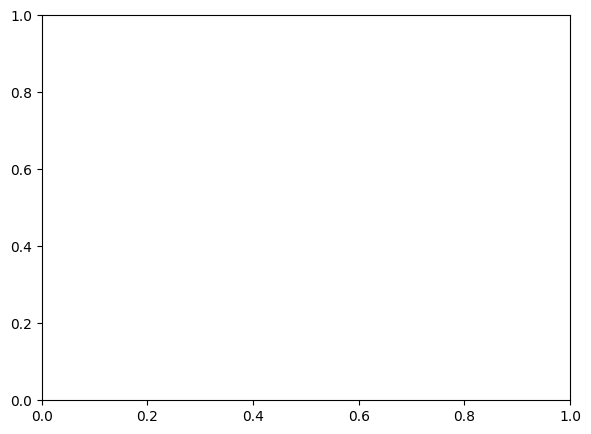

In [45]:
import matplotlib.pyplot as plt

# Assuming `history` is the variable containing the training history

# Plot training history
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test_norm, Y_test, verbose=2)
print('\nTest Accuracy:', test_acc)
print('Test Loss:', test_loss)


In [22]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

# Function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

# Function to convert OpenCV Rectangle bounding box image into base64 byte string
def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format(str(b64encode(iobuf.getvalue()), 'utf-8'))
    return bbox_bytes

# Initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [23]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
import cv2
import numpy as np
import time

# Function to preprocess the image for recognition
def preprocess_for_recognition(img):
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_resized = img_resized / 255.0
    return np.expand_dims(img_resized, axis=0)

# Function to mark attendance
def mark_attendance(name):
    print(f"Marking attendance for {name}")

# Start streaming video from webcam
video_stream()

# Label for video
label_html = 'Capturing...'

# Initialize bounding box to empty
bbox = ''

# Dictionary to keep track of attendance
attendance_record = {}

# Delay between attendance markings (in seconds)
attendance_delay = 5

confidence_threshold = 0.7

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])

    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    faces = face_cascade.detectMultiScale(gray)

    for (x, y, w, h) in faces:
        face_roi = img[y:y+h, x:x+w]

        face_for_recognition = preprocess_for_recognition(face_roi)

        prediction = model.predict(face_for_recognition)
        predicted_class_index = np.argmax(prediction)
        confidence = prediction[0][predicted_class_index]
        predicted_class = CATEGORIES[predicted_class_index]

        if confidence > confidence_threshold and predicted_class not in attendance_record:
            mark_attendance(predicted_class)
            attendance_record[predicted_class] = True

            time.sleep(attendance_delay)

        bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(bbox_array, f'{predicted_class} ({confidence:.2f})', (x + 2, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes
